In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import zscore
from sklearn.manifold import TSNE,Isomap
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from scipy.stats import kurtosis,skew
from sklearn.preprocessing import PowerTransformer
import ollama
from IPython.display import Markdown, display
import warnings

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings("ignore")

In [2]:
df_login=pd.read_csv("../EDA_transform/data/login_transform.csv")
df_purchase=pd.read_csv("../EDA_transform/data/purchase_transform.csv")
df_equip=pd.read_csv("../EDA_transform/data/equipenhance_transform_cluster.csv")

In [3]:
df_login.shape,df_purchase.shape,df_equip.shape

((201416, 21), (37219, 11), (55138, 7))

In [4]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201416 entries, 0 to 201415
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vopenid                201416 non-null  object 
 1   last_update_time       201416 non-null  object 
 2   num_login              201416 non-null  int64  
 3   num_day_login          201416 non-null  int64  
 4   login_frequency        201416 non-null  float64
 5   avg_weekly_login       201416 non-null  float64
 6   std_weekly_login       201416 non-null  float64
 7   streak_login           201416 non-null  int64  
 8   days_since_last_login  201416 non-null  int64  
 9   popular_time_login     201416 non-null  int64  
 10  gold_std_login         201416 non-null  float64
 11  diamond_std_login      201416 non-null  float64
 12  silkcoin_std_login     201416 non-null  float64
 13  gold_slope_login       201416 non-null  float64
 14  diamond_slope_login    201416 non-nu

In [5]:
df_purchase.columns

Index(['vopenid', 'last_update_time', 'total_purchase', 'num_purchase',
       'max_purchase', 'avg_purchase', 'frequency_purchase',
       'count_purchase_on_day', 'std_amount_purchase',
       'days_since_last_purchase', 'num_product_buyed'],
      dtype='object')

In [6]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37219 entries, 0 to 37218
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vopenid                   37219 non-null  int64  
 1   last_update_time          37219 non-null  object 
 2   total_purchase            37219 non-null  float64
 3   num_purchase              37219 non-null  int64  
 4   max_purchase              37219 non-null  float64
 5   avg_purchase              37219 non-null  float64
 6   frequency_purchase        37219 non-null  float64
 7   count_purchase_on_day     37219 non-null  float64
 8   std_amount_purchase       37219 non-null  float64
 9   days_since_last_purchase  37219 non-null  int64  
 10  num_product_buyed         37219 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 3.1+ MB


In [7]:
df_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55138 entries, 0 to 55137
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vopenid                   55138 non-null  object 
 1   last_update_time          55138 non-null  object 
 2   total_attempts            55138 non-null  int64  
 3   total_success_wt          55138 non-null  int64  
 4   equipenhance_lucky        55138 non-null  float64
 5   max_consecutive_failures  55138 non-null  int64  
 6   equi_beha                 55138 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 2.9+ MB


In [8]:
df_login.columns

Index(['vopenid', 'last_update_time', 'num_login', 'num_day_login',
       'login_frequency', 'avg_weekly_login', 'std_weekly_login',
       'streak_login', 'days_since_last_login', 'popular_time_login',
       'gold_std_login', 'diamond_std_login', 'silkcoin_std_login',
       'gold_slope_login', 'diamond_slope_login', 'silkcoin_slope_login',
       'short_lifetime_flag', 'powerpoint_last_login', 'level_last_login',
       'vip_last_login', 'churn'],
      dtype='object')

#### **Engagement Behavior** 

In [9]:
data_engag=df_login[['vopenid',
                     'last_update_time',
                     'num_login',
                     'num_day_login',
                     'streak_login',
                     'login_frequency',
                     'avg_weekly_login',
                     'std_weekly_login',
                     'days_since_last_login',
                ]]
data_engag

,vopenid,last_update_time,num_login,num_day_login,streak_login,login_frequency,avg_weekly_login,std_weekly_login,days_since_last_login
0,2206111754266455,2025-05-08 11:08:20+00:00,2,2,2,1.00,2.00,0.00,42
1,2206111758351763,2025-05-26 05:07:07+00:00,1,1,1,1.00,1.00,0.00,24
2,2206111808105074,2025-06-16 02:01:16+00:00,6,2,2,3.00,6.00,1.00,3
3,2206111830413361,2025-06-19 14:54:55+00:00,164,47,36,3.49,23.43,6.91,0
4,2206111904162575,2025-05-20 01:58:44+00:00,1,1,1,1.00,1.00,0.00,30
...,...,...,...,...,...,...,...,...,...
201411,lkeu,2025-06-18 06:40:34+00:00,2,2,1,1.00,2.00,0.00,1
201412,lknew,2025-06-12 04:50:52+00:00,4,2,1,2.00,1.33,1.00,7
201413,tri3,2025-06-16 08:20:13+00:00,2,1,1,2.00,2.00,0.00,3
201414,vtvinh,2025-06-17 07:10:48+00:00,9,3,2,3.00,9.00,3.50,2


In [10]:
# data_engag=data_engag[data_engag['num_day_login']>1]

In [11]:
for col in ['num_day_login', 'streak_login', 'num_login', 'login_frequency','avg_weekly_login','days_since_last_login']:
    print(f'{col}: Skewness = {skew(data_engag[col]):.2f}')

num_day_login: Skewness = 0.63
streak_login: Skewness = 1.64
num_login: Skewness = 7.91
login_frequency: Skewness = 26.09
avg_weekly_login: Skewness = 20.15
days_since_last_login: Skewness = 1.34


In [12]:
for col in ['num_day_login', 'streak_login', 'num_login', 'login_frequency','avg_weekly_login','days_since_last_login']:
    print(f'{col}: Kurtosis = {kurtosis(data_engag[col], fisher=False):.2f}')

num_day_login: Kurtosis = 1.88
streak_login: Kurtosis = 4.78
num_login: Kurtosis = 161.81
login_frequency: Kurtosis = 1902.53
avg_weekly_login: Kurtosis = 1293.09
days_since_last_login: Kurtosis = 3.65


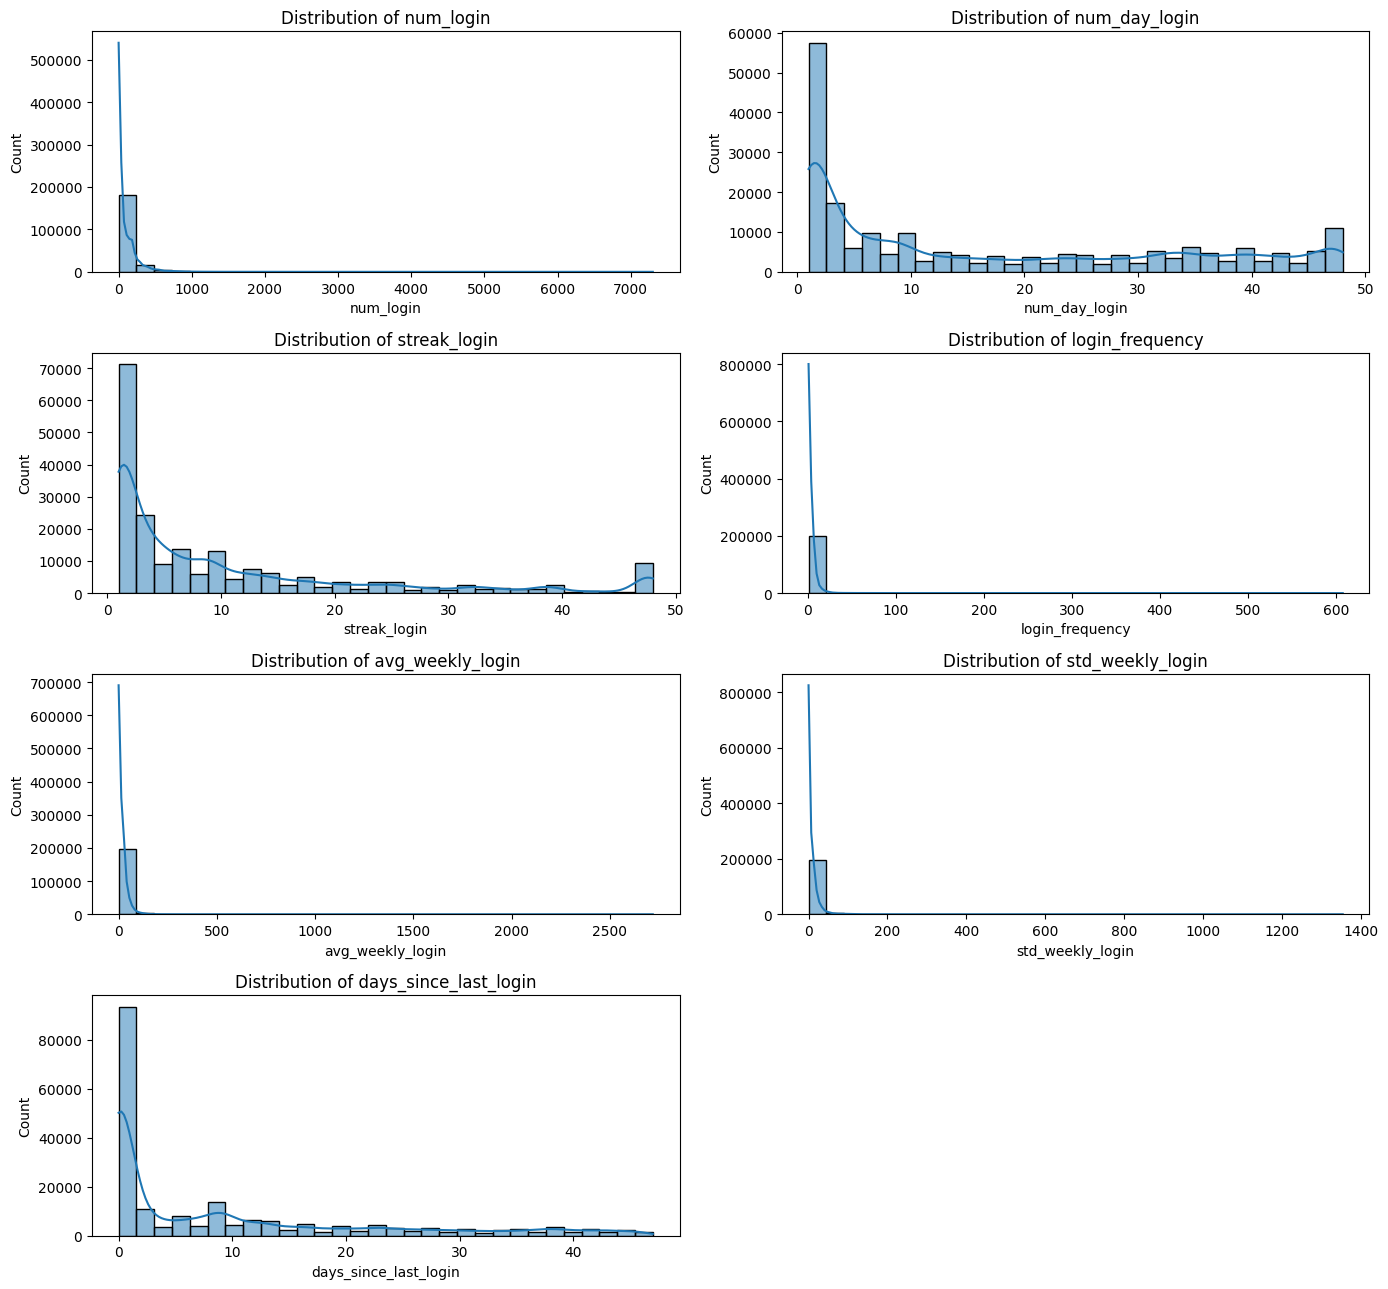

In [13]:
columns = [
    'num_login',
    'num_day_login',
    'streak_login',
    'login_frequency',
    'avg_weekly_login',
    'std_weekly_login',
    'days_since_last_login',
]

plt.figure(figsize=(14, 13))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data_engag[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

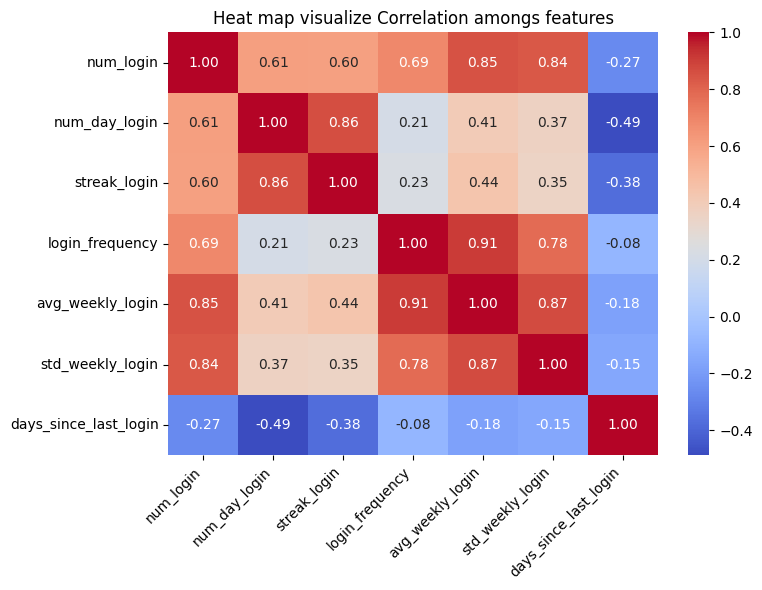

In [14]:
corr_cols = data_engag.drop(columns=['vopenid','last_update_time']).columns

plt.figure(figsize=(8,6))
sns.heatmap(data_engag[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

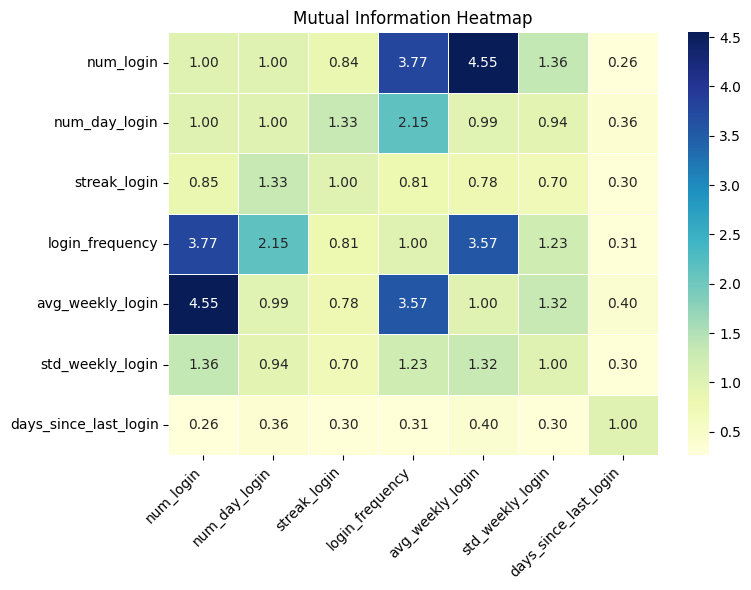

In [15]:
cols = data_engag.drop(columns=['vopenid', 'last_update_time']).columns
df = data_engag[cols]
mi_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

for i, col_x in enumerate(cols):
    for j, col_y in enumerate(cols):
        if i == j:
            mi_matrix.loc[col_x, col_y] = 1
        else:
            mi = mutual_info_regression(df[[col_x]], df[col_y], discrete_features=False, random_state=42)
            mi_matrix.loc[col_x, col_y] = mi[0]

plt.figure(figsize=(8, 6))
sns.heatmap(mi_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Mutual Information Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
cols_purchase = [
    'num_day_login',
    'streak_login',
    'days_since_last_login',
    'login_frequency',
    'std_weekly_login',
]

X = data_engag[cols_purchase]

In [17]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.min(), X_scaled.max()

(np.float64(-0.49625668449197863), np.float64(150.11764705882354))

In [18]:
num_cluster = 4

In [19]:
kmeans = KMeans(n_clusters=num_cluster, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
data_engag['kmeans_cluster'] = kmeans_labels 

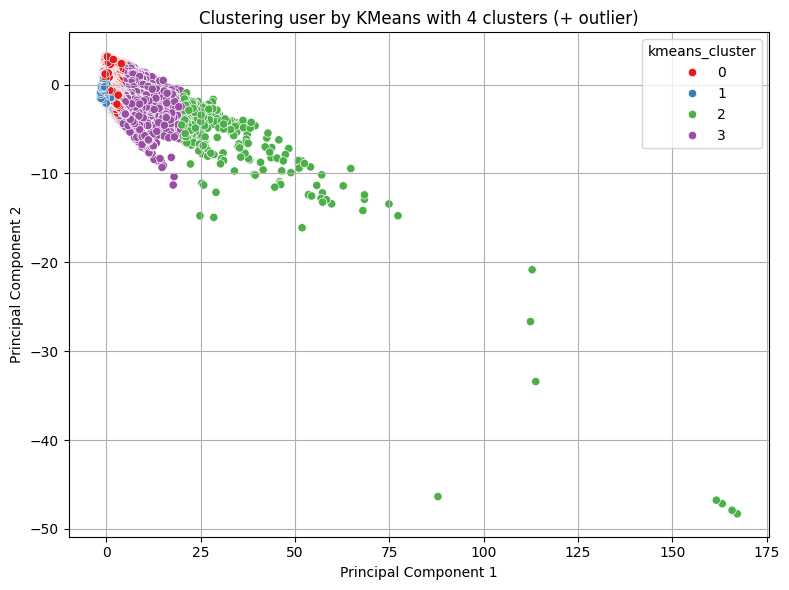

In [20]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

data_engag['pca_kmean_1'] = pca_result[:, 0]
data_engag['pca_kmean_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_engag,
    x='pca_kmean_1', y='pca_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering user by KMeans with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
cluster_stats = data_engag.groupby('kmeans_cluster')[
    [
        'num_day_login',
        'streak_login',
        'days_since_last_login',
        'login_frequency',
        'std_weekly_login',
    ]   
].mean().round(2)

cluster_counts = data_engag['kmeans_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='num_day_login', ascending=False)
cluster_summary

,num_day_login,streak_login,days_since_last_login,login_frequency,std_weekly_login,num_users,percent_users
kmeans_cluster,,,,,,,
0,35.29,25.13,2.51,6.32,17.71,58374,28.98
2,31.54,23.43,8.90,82.97,340.33,292,0.14
3,29.42,20.35,7.23,20.76,76.37,5100,2.53
1,8.44,3.98,12.62,2.93,2.80,137650,68.34


In [22]:
ch_kmeans = calinski_harabasz_score(X_scaled, data_engag['kmeans_cluster'])
print(f"KMeans Calinski–Harabasz Index: {ch_kmeans:.4f}")

KMeans Calinski–Harabasz Index: 91025.2465


In [23]:
db_kmeans = davies_bouldin_score(X_scaled, data_engag['kmeans_cluster'])
print(f"KMeans Davies–Bouldin Index: {db_kmeans:.4f}")

KMeans Davies–Bouldin Index: 0.8924


In [24]:
# sh_kmeans = silhouette_score(X_scaled, data_engag['kmeans_cluster'])
# print(f"KMeans Silhouette score : {sh_kmeans:.4f}")

In [25]:
engag_labels = {
    0: "Power User",
    2: "High Engagement",
    1: "Moderate Engagement",
    3: "Low Engagement",
}
data_engag['name_cluster'] = data_engag['kmeans_cluster'].map(engag_labels)
data_engag.to_csv('user_engagement_clusters.csv', index=False, header=True)

#### **Purchase behavior**

In [26]:
df_purchase.columns

Index(['vopenid', 'last_update_time', 'total_purchase', 'num_purchase',
       'max_purchase', 'avg_purchase', 'frequency_purchase',
       'count_purchase_on_day', 'std_amount_purchase',
       'days_since_last_purchase', 'num_product_buyed'],
      dtype='object')

In [27]:
data_purchase=df_purchase[[
        'vopenid',
        'last_update_time',
        'total_purchase',
        'num_purchase',
        'max_purchase',
        'avg_purchase',
        'frequency_purchase',
        'count_purchase_on_day',
        'std_amount_purchase',
        'days_since_last_purchase'
    ]]
data_purchase

,vopenid,last_update_time,total_purchase,num_purchase,max_purchase,avg_purchase,frequency_purchase,count_purchase_on_day,std_amount_purchase,days_since_last_purchase
0,2206151945395710,2025-06-24 22:46:22.711000+00:00,3.99,1,3.99,3.99,1.00,1.00,0.00,1
1,2206211830166192,2025-05-24 15:48:36.757000+00:00,0.79,1,0.79,0.79,1.00,1.00,0.00,32
2,2208132058338497,2025-06-20 03:06:03.875000+00:00,1.99,1,1.99,1.99,1.00,1.00,0.00,6
3,2210221534402190,2025-05-26 05:14:28.541000+00:00,7.88,1,7.88,7.88,1.00,1.00,0.00,31
4,2210221828089318,2025-06-11 14:06:52.646000+00:00,3.98,2,1.99,1.99,2.00,2.00,0.00,14
...,...,...,...,...,...,...,...,...,...,...
37214,6210001017824,2025-06-25 03:01:13.202000+00:00,17.79,5,7.88,3.56,1.25,1.25,2.56,1
37215,6210001048809,2025-05-02 05:53:07.510000+00:00,1.99,1,1.99,1.99,1.00,1.00,0.00,55
37216,6210001076576,2025-05-05 18:33:57.853000+00:00,1.58,1,1.58,1.58,1.00,1.00,0.00,51
37217,6220001331202,2025-06-12 14:39:00.448000+00:00,1.99,1,1.99,1.99,1.00,1.00,0.00,13


In [28]:
for col in [
            'total_purchase',
            'num_purchase',
            'max_purchase',
            'avg_purchase',
            'frequency_purchase',
            'count_purchase_on_day',
            'std_amount_purchase',
            'days_since_last_purchase']:
    print(f'{col}: Skewness = {skew(data_purchase[col]):.2f}')
    

total_purchase: Skewness = 27.19
num_purchase: Skewness = 10.60
max_purchase: Skewness = 11.30
avg_purchase: Skewness = 14.94
frequency_purchase: Skewness = 4.63
count_purchase_on_day: Skewness = 4.63
std_amount_purchase: Skewness = 10.77
days_since_last_purchase: Skewness = 0.61


In [29]:
for col in [
            'total_purchase',
            'num_purchase',
            'max_purchase',
            'avg_purchase',
            'frequency_purchase',
            'count_purchase_on_day',
            'std_amount_purchase',
            'days_since_last_purchase']:
    print(f'{col}: Kurtosis = {kurtosis(data_purchase[col], fisher=False):.2f}')

total_purchase: Kurtosis = 1278.40
num_purchase: Kurtosis = 232.08
max_purchase: Kurtosis = 183.88
avg_purchase: Kurtosis = 425.51
frequency_purchase: Kurtosis = 32.69
count_purchase_on_day: Kurtosis = 32.69
std_amount_purchase: Kurtosis = 187.07
days_since_last_purchase: Kurtosis = 2.20


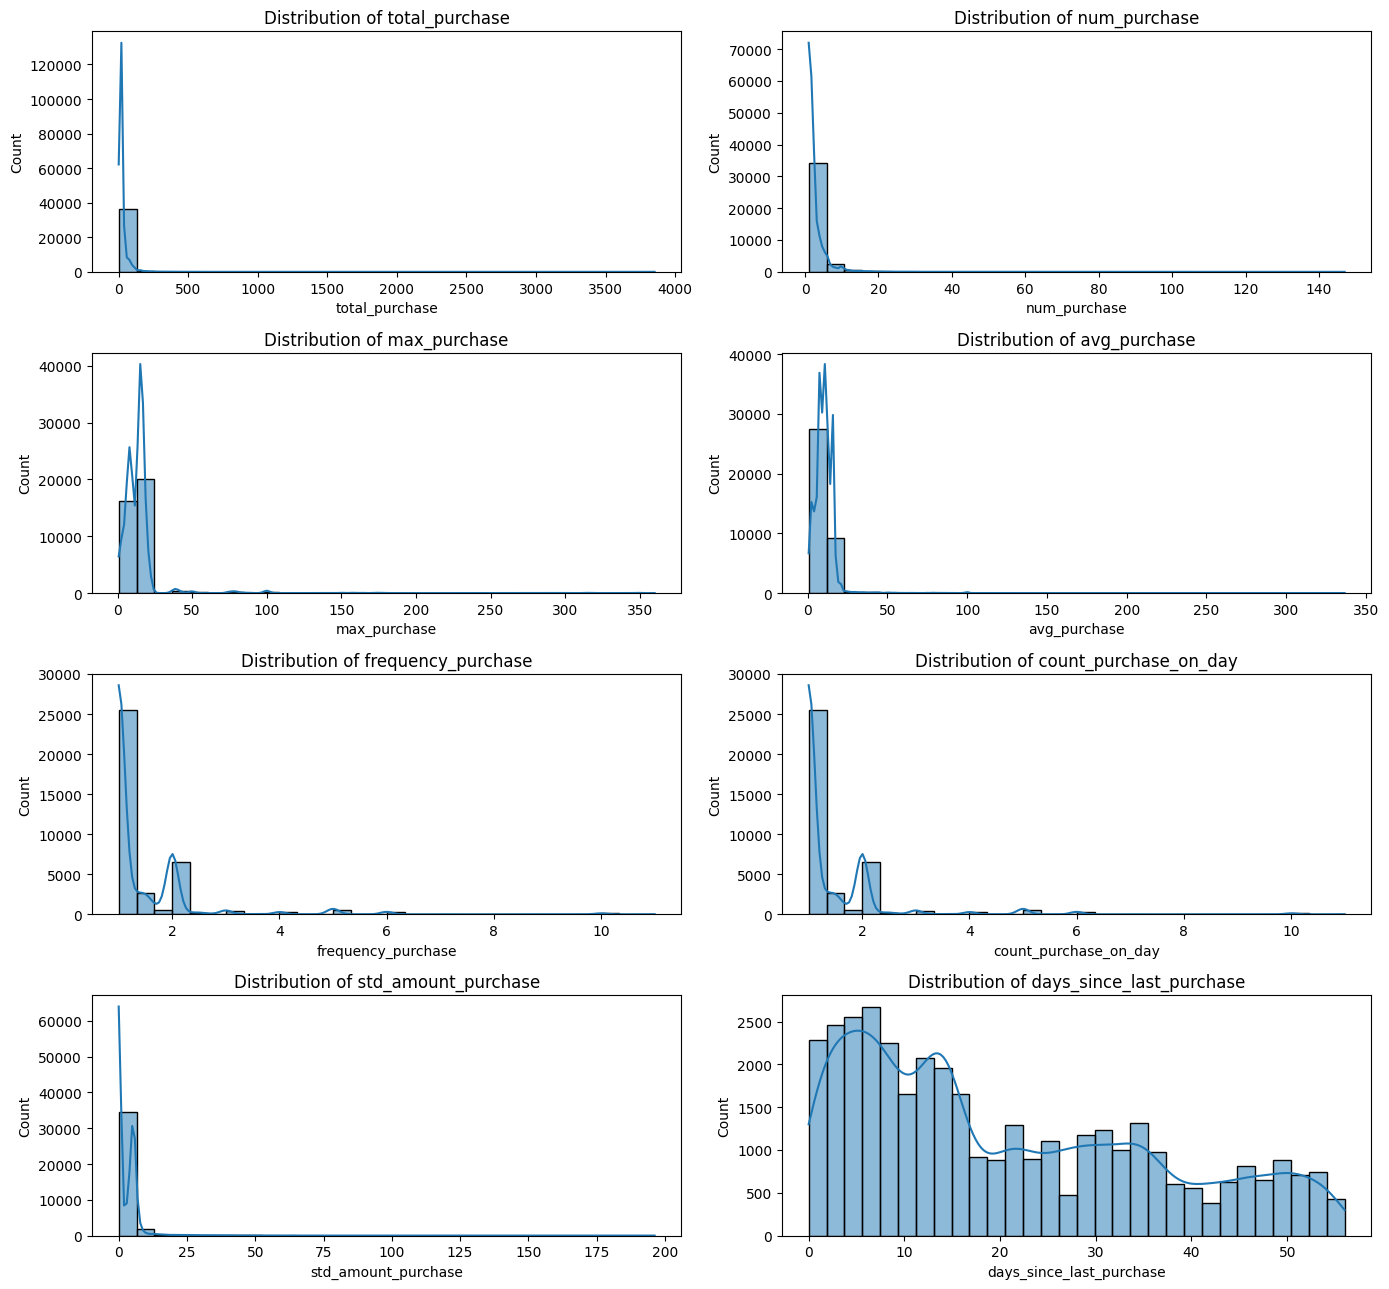

In [30]:
columns = [
        'total_purchase',
        'num_purchase',
        'max_purchase',
        'avg_purchase',
        'frequency_purchase',
        'count_purchase_on_day',
        'std_amount_purchase',
        'days_since_last_purchase'
    ]

plt.figure(figsize=(14, 13))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data_purchase[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

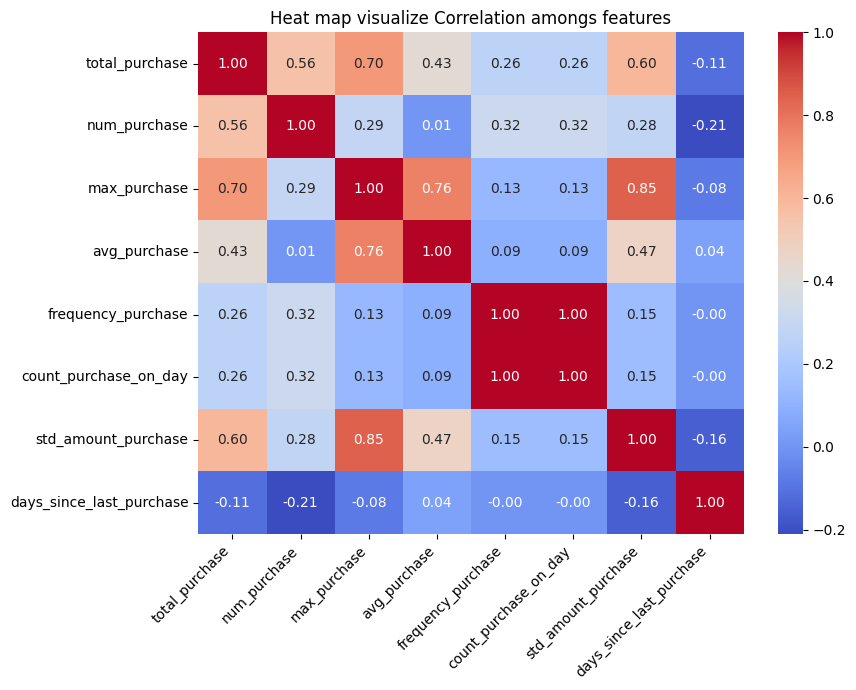

In [31]:
corr_cols = data_purchase.drop(columns=['vopenid','last_update_time']).columns

plt.figure(figsize=(9,7))
sns.heatmap(data_purchase[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

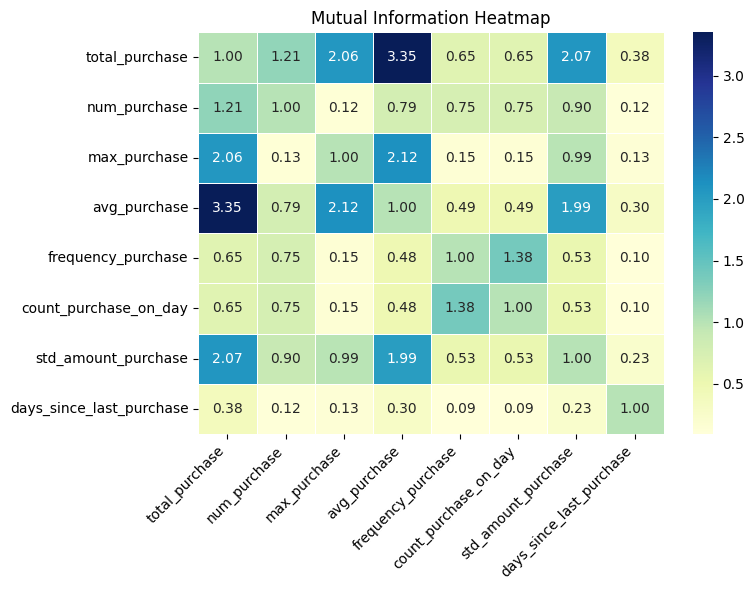

In [32]:
cols = data_purchase.drop(columns=['vopenid', 'last_update_time']).columns
df = data_purchase[cols]
mi_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

for i, col_x in enumerate(cols):
    for j, col_y in enumerate(cols):
        if i == j:
            mi_matrix.loc[col_x, col_y] = 1
        else:
            mi = mutual_info_regression(df[[col_x]], df[col_y], discrete_features=False, random_state=42)
            mi_matrix.loc[col_x, col_y] = mi[0]

plt.figure(figsize=(8, 6))
sns.heatmap(mi_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Mutual Information Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
cols_purchase = [
        'total_purchase',
        'num_purchase',
        #'max_purchase',
        #'avg_purchase',
        'frequency_purchase',
        'count_purchase_on_day',
        'std_amount_purchase',
        'days_since_last_purchase'
    ]

X = data_purchase[cols_purchase]

pt = PowerTransformer(method='yeo-johnson')
X = pt.fit_transform(X)
X

array([[-1.5659458 , -1.08511027, -0.69723247, -0.69723247, -0.93220451,
        -1.72893479],
       [-2.91590369, -1.08511027, -0.69723247, -0.69723247, -0.93220451,
         0.83695107],
       [-2.22911417, -1.08511027, -0.69723247, -0.69723247, -0.93220451,
        -0.89140493],
       ...,
       [-2.42420389, -1.08511027, -0.69723247, -0.69723247, -0.93220451,
         1.55658618],
       [-2.22911417, -1.08511027, -0.69723247, -0.69723247, -0.93220451,
        -0.23658262],
       [-0.38553995,  0.25793272,  1.52944915,  1.52944915,  1.10951519,
        -0.23658262]])

In [34]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.min(), X_scaled.max()

(np.float64(-3.0044479437127114), np.float64(5.657505736595625))

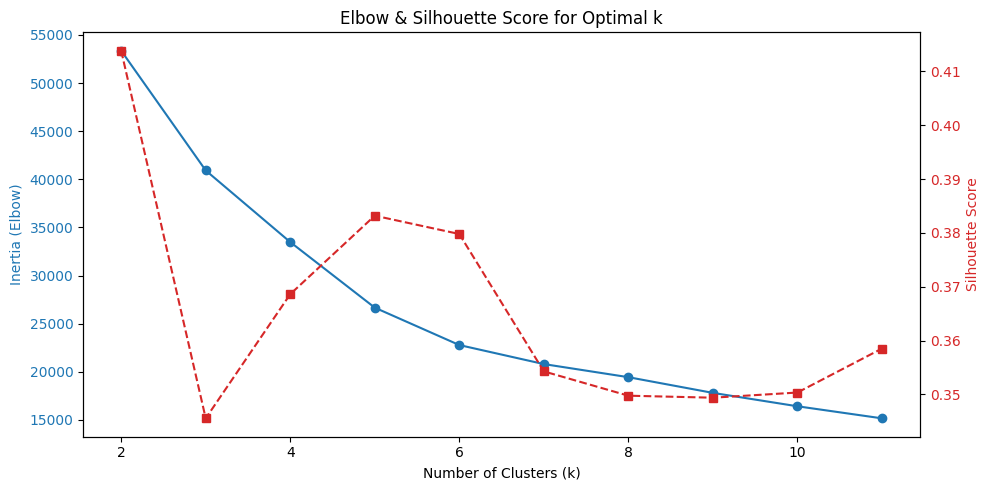

In [35]:
inertia = []
silhouette = []
K_range = range(2, 12) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))

fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Elbow)', color=color)
ax1.plot(K_range, inertia, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(K_range, silhouette, marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow & Silhouette Score for Optimal k')
plt.tight_layout()
plt.show()

In [36]:
num_cluster = 5

In [37]:
# kmeans = KMeans(n_clusters=num_cluster, random_state=42, n_init=10)
# kmeans_labels = kmeans.fit_predict(X_scaled[~outlier_mask])
# data_purchase.loc[~outlier_mask, 'kmeans_cluster'] = kmeans_labels

kmeans = KMeans(n_clusters=num_cluster, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
data_purchase['kmeans_cluster'] = kmeans_labels

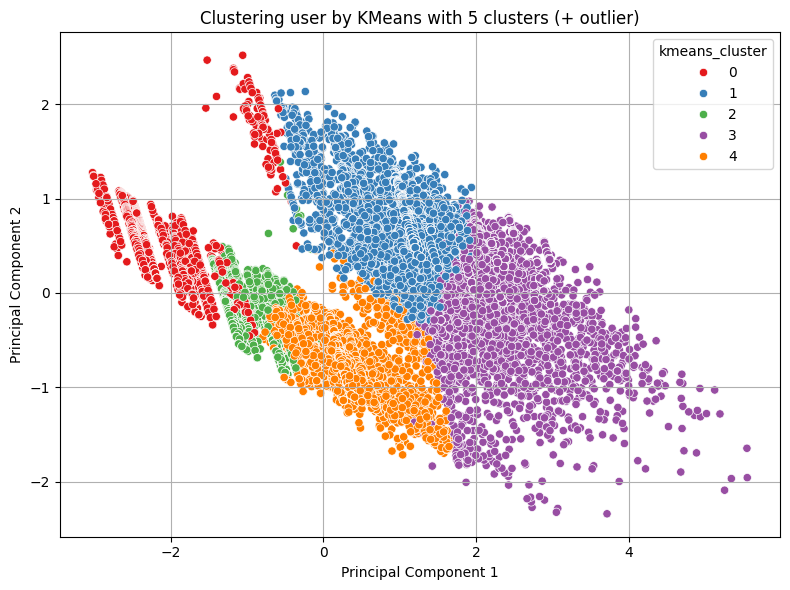

In [38]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

data_purchase['pca_kmean_1'] = pca_result[:, 0]
data_purchase['pca_kmean_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_purchase,
    x='pca_kmean_1', y='pca_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering user by KMeans with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
data_purchase.columns

Index(['vopenid', 'last_update_time', 'total_purchase', 'num_purchase',
       'max_purchase', 'avg_purchase', 'frequency_purchase',
       'count_purchase_on_day', 'std_amount_purchase',
       'days_since_last_purchase', 'kmeans_cluster', 'pca_kmean_1',
       'pca_kmean_2'],
      dtype='object')

In [40]:
cluster_stats = data_purchase.groupby('kmeans_cluster')[
    [
       'total_purchase',
        'num_purchase',
        #'max_purchase',
        #'avg_purchase',
        'frequency_purchase',
        'count_purchase_on_day',
        'std_amount_purchase',
        'days_since_last_purchase'
    ]   
].mean().round(2)

cluster_counts = data_purchase['kmeans_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='total_purchase', ascending=False)
cluster_summary

,total_purchase,num_purchase,frequency_purchase,count_purchase_on_day,std_amount_purchase,days_since_last_purchase,num_users,percent_users
kmeans_cluster,,,,,,,,
3,106.18,8.12,2.76,2.76,9.17,13.65,4385,11.78
4,25.59,2.71,1.01,1.01,4.21,12.87,7592,20.40
1,23.47,2.65,1.93,1.93,4.82,18.76,8057,21.65
2,12.31,1.14,1.00,1.00,0.05,27.37,13804,37.09
0,2.70,1.18,1.05,1.05,0.06,21.83,3381,9.08


In [41]:
ch_kmeans = calinski_harabasz_score(X_scaled, data_purchase['kmeans_cluster'])
print(f"KMeans Calinski–Harabasz Index: {ch_kmeans:.4f}")

KMeans Calinski–Harabasz Index: 25394.4949


In [42]:
db_kmeans = davies_bouldin_score(X_scaled, data_purchase['kmeans_cluster'])
print(f"KMeans Davies–Bouldin Index: {db_kmeans:.4f}")

KMeans Davies–Bouldin Index: 1.0296


In [43]:
# sh_kmeans = silhouette_score(X_scaled, data_purchase['kmeans_cluster'])
# print(f"KMeans Silhouette score : {sh_kmeans:.4f}")

In [ ]:
purchase_labels = {
    3: "Whale",
    4: "High Spending",
    1: "Quite Spending",
    2: "Medium Spending",
    0: "Low Spending",
}
data_purchase['name_cluster'] = data_purchase['kmeans_cluster'].map(purchase_labels)
data_purchase.to_csv('user_purchase_clusters.csv', index=False,header=True)

In [45]:
df_whale=data_purchase[data_purchase['name_cluster']=='Whale']

In [46]:
df_whale['total_purchase'].describe()

count   4385.00
mean     106.18
std      156.06
min       32.91
25%       54.00
50%       75.00
75%      105.00
max     3852.06
Name: total_purchase, dtype: float64

In [47]:
data_purchase[data_purchase['name_cluster']=='High Spending']['total_purchase'].describe()

count   3381.00
mean       2.70
std        1.18
min        0.75
25%        1.99
50%        1.99
75%        3.94
max        6.32
Name: total_purchase, dtype: float64

In [48]:
data_purchase[data_purchase['name_cluster']=='Quite Spending']['total_purchase'].describe()

count   13804.00
mean       12.31
std         4.02
min         5.25
25%         7.88
50%        15.00
75%        15.75
max        45.00
Name: total_purchase, dtype: float64

In [49]:
data_purchase[data_purchase['name_cluster']=='Medium Spending']['total_purchase'].describe()

count   8057.00
mean      23.47
std        6.74
min        3.75
25%       22.50
50%       23.63
75%       24.00
max       52.30
Name: total_purchase, dtype: float64

#### **Data progression**

In [50]:
df_login.columns,df_equip.columns

(Index(['vopenid', 'last_update_time', 'num_login', 'num_day_login',
        'login_frequency', 'avg_weekly_login', 'std_weekly_login',
        'streak_login', 'days_since_last_login', 'popular_time_login',
        'gold_std_login', 'diamond_std_login', 'silkcoin_std_login',
        'gold_slope_login', 'diamond_slope_login', 'silkcoin_slope_login',
        'short_lifetime_flag', 'powerpoint_last_login', 'level_last_login',
        'vip_last_login', 'churn'],
       dtype='object'),
 Index(['vopenid', 'last_update_time', 'total_attempts', 'total_success_wt',
        'equipenhance_lucky', 'max_consecutive_failures', 'equi_beha'],
       dtype='object'))

In [51]:
login_cols = [
    'vopenid',
    'gold_std_login', 'gold_slope_login',
    'diamond_std_login', 'diamond_slope_login',
    'silkcoin_std_login', 'silkcoin_slope_login',
    'powerpoint_last_login', 'vip_last_login', 'level_last_login'
]
equip_cols = ['vopenid', 'equi_beha']


data_progress = df_login[login_cols].merge(
    df_equip[equip_cols],
    on='vopenid',
    how='left'
)
data_progress['equi_beha'] = data_progress['equi_beha'].fillna('None')
# df_merged

In [52]:
le = LabelEncoder()
data_progress['equi_beha'] = le.fit_transform(data_progress['equi_beha'])

In [53]:
for col in ['gold_std_login', 'diamond_std_login', 'silkcoin_std_login', 'gold_slope_login', 'diamond_slope_login', 'silkcoin_slope_login','vip_last_login', 'powerpoint_last_login']:
    print(f'{col}: Skewness = {skew(data_progress[col]):.2f}')

gold_std_login: Skewness = 10.07
diamond_std_login: Skewness = 6.57
silkcoin_std_login: Skewness = 74.03
gold_slope_login: Skewness = -44.70
diamond_slope_login: Skewness = 59.86
silkcoin_slope_login: Skewness = 6.04
vip_last_login: Skewness = 2.85
powerpoint_last_login: Skewness = 4.24


In [54]:
for col in ['gold_std_login', 'diamond_std_login', 'silkcoin_std_login', 'gold_slope_login', 'diamond_slope_login', 'silkcoin_slope_login','vip_last_login', 'powerpoint_last_login']:
    print(f'{col}: Kurtosis = {kurtosis(data_progress[col], fisher=False):.2f}')

gold_std_login: Kurtosis = 208.00
diamond_std_login: Kurtosis = 158.61
silkcoin_std_login: Kurtosis = 11079.45
gold_slope_login: Kurtosis = 11107.47
diamond_slope_login: Kurtosis = 9660.13
silkcoin_slope_login: Kurtosis = 8064.31
vip_last_login: Kurtosis = 9.17
powerpoint_last_login: Kurtosis = 23.15


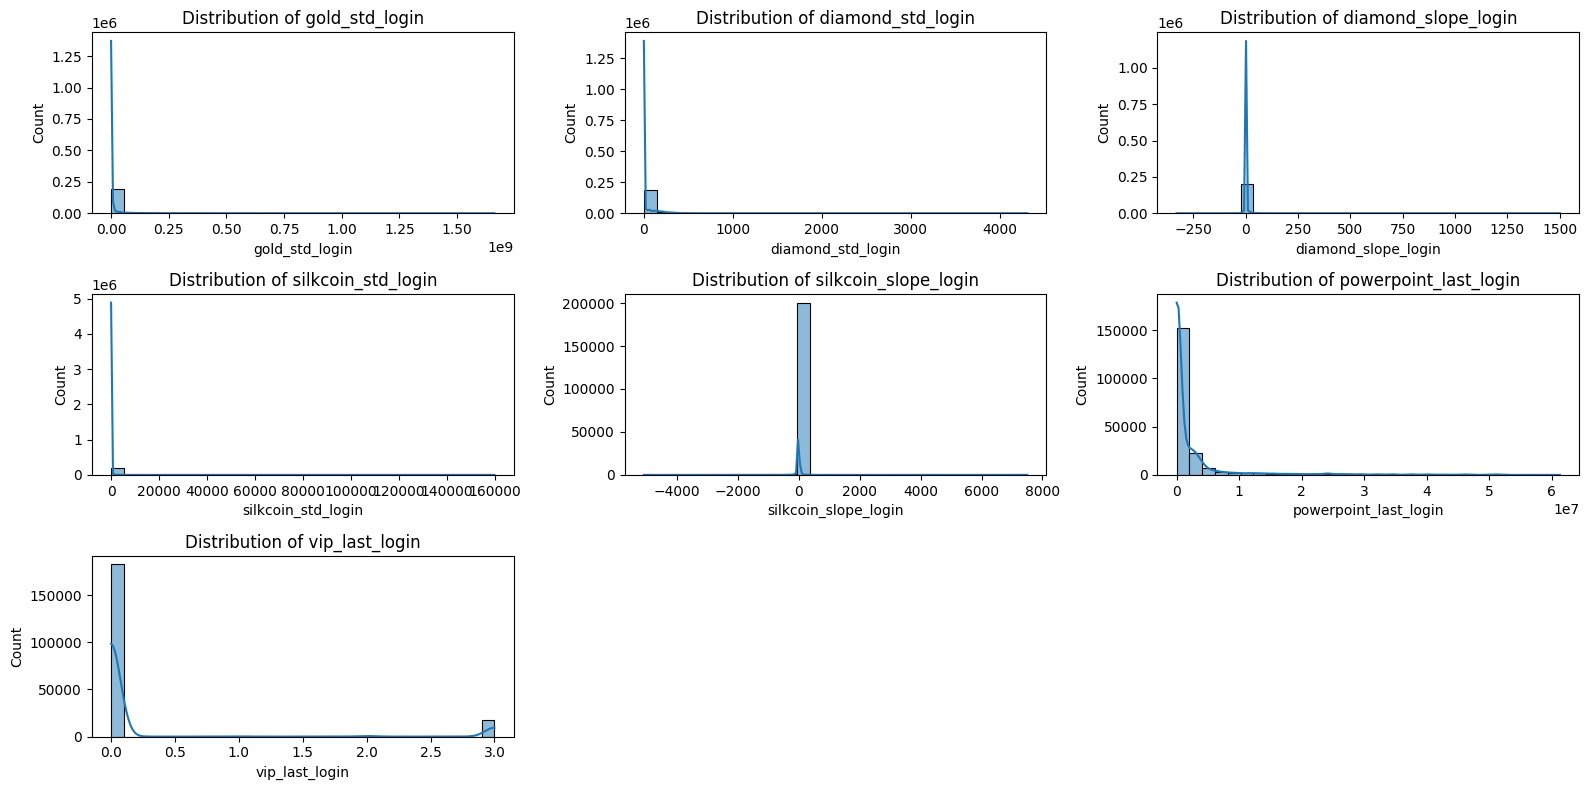

In [55]:
columns = [
    'gold_std_login', 
    #'gold_slope_login',
    'diamond_std_login', 'diamond_slope_login',
    'silkcoin_std_login', 'silkcoin_slope_login',
    'powerpoint_last_login', 'vip_last_login', 
    #'level_last_login'
]

plt.figure(figsize=(16, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_progress[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

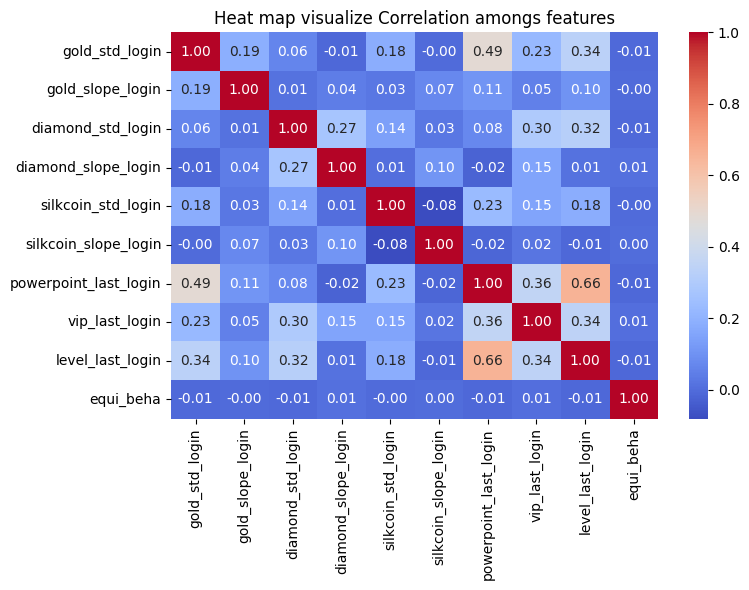

In [56]:
corr_cols = data_progress.drop(columns=['vopenid']).columns

plt.figure(figsize=(8,6))
sns.heatmap(data_progress[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

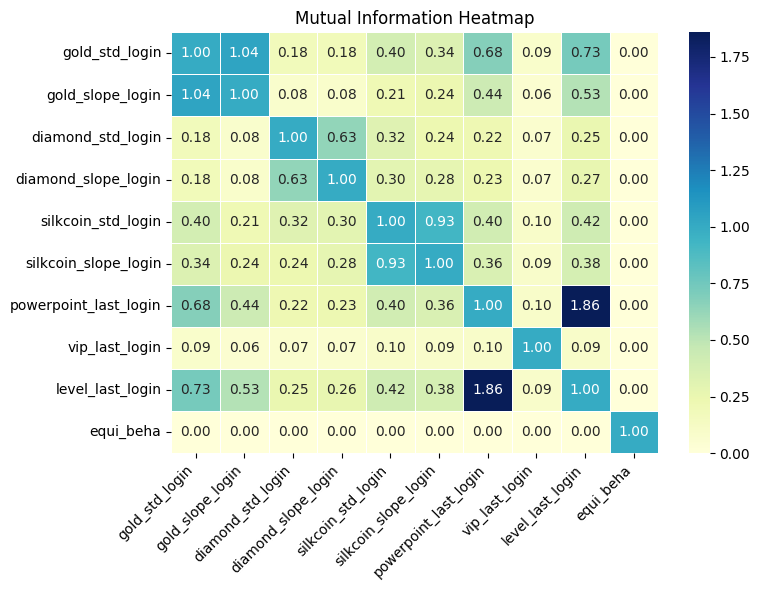

In [57]:
cols = data_progress.drop(columns=['vopenid']).columns
df = data_progress[cols]
mi_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

for i, col_x in enumerate(cols):
    for j, col_y in enumerate(cols):
        if i == j:
            mi_matrix.loc[col_x, col_y] = 1
        else:
            mi = mutual_info_regression(df[[col_x]], df[col_y], discrete_features=False, random_state=42)
            mi_matrix.loc[col_x, col_y] = mi[0]

plt.figure(figsize=(8, 6))
sns.heatmap(mi_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Mutual Information Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
cols_purchase = [
    'gold_std_login',
    #'gold_slope_login',
    'diamond_std_login',
    #'diamond_slope_login',
    'silkcoin_std_login', 
    #'silkcoin_slope_login',
    'powerpoint_last_login',
    'vip_last_login', 
    #'level_last_login',
    'equi_beha'
]

X = data_progress[cols_purchase]

from scipy.stats import zscore

z_scores = np.abs(zscore(X))
mask = (z_scores < 5).all(axis=1)  

X = X[mask]
data_progress = data_progress.loc[mask].reset_index(drop=True)

In [59]:
pt = PowerTransformer(method='yeo-johnson')
X = pt.fit_transform(X)
X.min(),X.max()

(np.float64(-1.6992957044339498), np.float64(3.329057603758869))

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
X_scaled.min(),X_scaled.max()

(np.float64(-1.6992957044339492), np.float64(3.3290576037588693))

In [62]:
num_cluster = 5

In [63]:
kmeans = KMeans(n_clusters=num_cluster, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
data_progress['kmeans_cluster'] = kmeans_labels

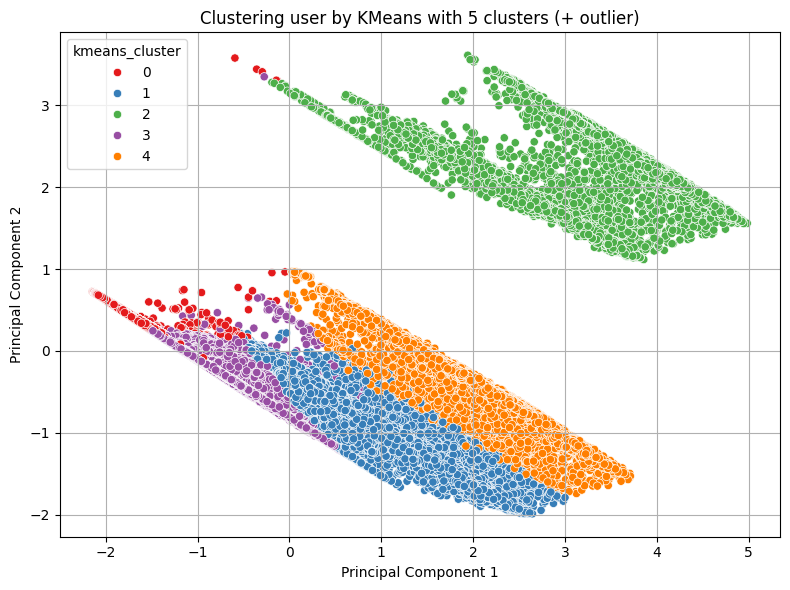

In [64]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

data_progress['pca_kmean_1'] = pca_result[:, 0]
data_progress['pca_kmean_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_progress,
    x='pca_kmean_1', y='pca_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering user by KMeans with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
ch_kmeans = calinski_harabasz_score(X_scaled, data_progress['kmeans_cluster'])
print(f"KMeans Calinski–Harabasz Index: {ch_kmeans:.4f}")

KMeans Calinski–Harabasz Index: 189619.3301


In [66]:
db_kmeans = davies_bouldin_score(X_scaled, data_progress['kmeans_cluster'])
print(f"KMeans Davies–Bouldin Index: {db_kmeans:.4f}")

KMeans Davies–Bouldin Index: 0.8269


In [67]:
# sh_kmeans = silhouette_score(X_scaled, data_progress['kmeans_cluster'])
# print(f"KMeans Silhouette score : {sh_kmeans:.4f}")

KMeans Silhouette score : 0.4597


In [68]:
data_engag.columns,data_purchase.columns,data_progress.columns

(Index(['vopenid', 'last_update_time', 'num_login', 'num_day_login',
        'streak_login', 'login_frequency', 'avg_weekly_login',
        'std_weekly_login', 'days_since_last_login', 'kmeans_cluster',
        'pca_kmean_1', 'pca_kmean_2', 'name_cluster'],
       dtype='object'),
 Index(['vopenid', 'last_update_time', 'total_purchase', 'num_purchase',
        'max_purchase', 'avg_purchase', 'frequency_purchase',
        'count_purchase_on_day', 'std_amount_purchase',
        'days_since_last_purchase', 'kmeans_cluster', 'pca_kmean_1',
        'pca_kmean_2', 'name_cluster'],
       dtype='object'),
 Index(['vopenid', 'gold_std_login', 'gold_slope_login', 'diamond_std_login',
        'diamond_slope_login', 'silkcoin_std_login', 'silkcoin_slope_login',
        'powerpoint_last_login', 'vip_last_login', 'level_last_login',
        'equi_beha', 'kmeans_cluster', 'pca_kmean_1', 'pca_kmean_2'],
       dtype='object'))

In [69]:
data_engag = data_engag.rename(columns={'kmeans_cluster': 'engag_cluster'})
data_purchase = data_purchase.rename(columns={'kmeans_cluster': 'purchase_cluster'})
data_progress = data_progress.rename(columns={'kmeans_cluster': 'progress_cluster'})

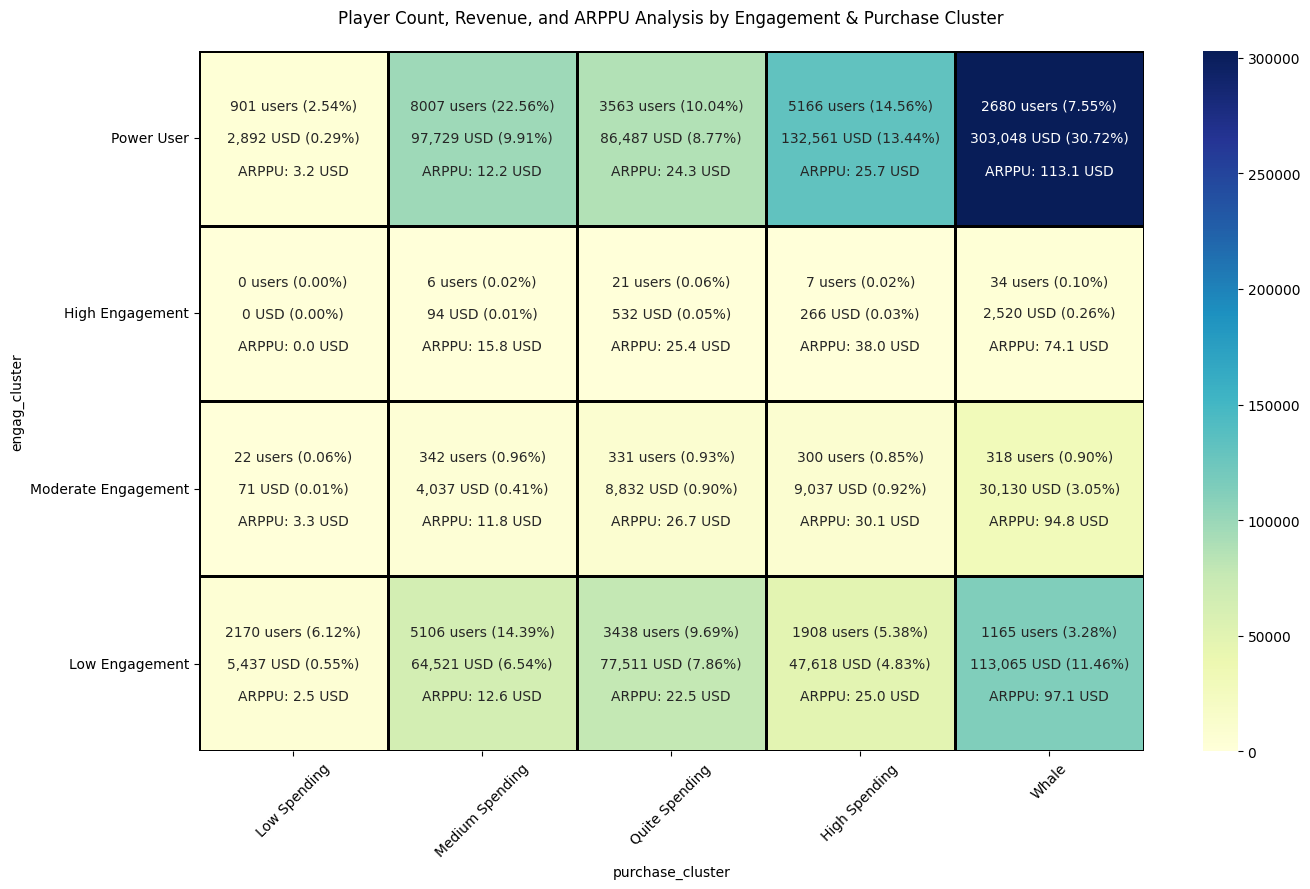

In [73]:
df_user_profile = data_engag.merge(
    data_purchase[['vopenid', 'purchase_cluster', 'total_purchase']],
    on="vopenid",
    how="inner"
)

cross_tab = (
    df_user_profile
      .groupby(['engag_cluster', 'purchase_cluster'])
      .size()
      .unstack(fill_value=0)
)
cross_tab_money = (
    df_user_profile
      .groupby(['engag_cluster', 'purchase_cluster'])['total_purchase']
      .sum()
      .unstack(fill_value=0)
      .fillna(0)
)

engag_labels = {
    0: "Power User",
    2: "High Engagement",
    3: "Moderate Engagement",
    1: "Low Engagement",
    # 3: "Non-Active"
}
purchase_labels = {
    3: "Whale",
    4: "High Spending",
    1: "Quite Spending",
    2: "Medium Spending",
    0: "Low Spending"
}

engag_order = [
    "Power User",
    "High Engagement",
    "Moderate Engagement",
    "Low Engagement",
    # "Non-Active"
]
purchase_order = [
    "Low Spending",
    "Medium Spending",
    "Quite Spending",
    "High Spending",
    "Whale"
]

cross_tab_renamed = cross_tab.rename(index=engag_labels, columns=purchase_labels)
cross_tab_money_renamed = cross_tab_money.rename(index=engag_labels, columns=purchase_labels)
count_ordered = cross_tab_renamed.reindex(index=engag_order, columns=purchase_order)
money_ordered = cross_tab_money_renamed.reindex(index=engag_order, columns=purchase_order)

total_users = count_ordered.values.sum()
total_money = money_ordered.values.sum()
annot_texts = count_ordered.copy().astype("object")

for i in count_ordered.index:
    for j in count_ordered.columns:
        user_count = count_ordered.loc[i, j]
        money_sum  = money_ordered.loc[i, j]
        user_pct   = (user_count / total_users * 100) if total_users > 0 else 0
        money_pct  = (money_sum / total_money * 100) if total_money > 0 else 0
        money_display = f"{int(money_sum):,}" if pd.notna(money_sum) else "0"
        avg_spending = money_sum / user_count if user_count > 0 else 0
        avg_display = f"{avg_spending:,.1f}"

        annot_texts.loc[i, j] = (
            f"{user_count} users ({user_pct:.2f}%)\n\n"
            f"{money_display} USD ({money_pct:.2f}%)\n\n"
            f"ARPPU: {avg_display} USD"
        )

plt.figure(figsize=(14, 9))
ax = sns.heatmap(
    money_ordered,
    annot=annot_texts,
    fmt="",
    cmap="YlGnBu",
    linewidths=1,
    linecolor='black',
    cbar=True
)
plt.title("Player Count, Revenue, and ARPPU Analysis by Engagement & Purchase Cluster", pad=20)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
total_money,total_users

(np.float64(986397.5700000001), np.int64(35485))

In [72]:
data_engag    = data_engag.rename(columns={'kmeans_cluster': 'engag_cluster'})
data_purchase = data_purchase.rename(columns={'kmeans_cluster': 'purchase_cluster'})
data_progress = data_progress.rename(columns={'kmeans_cluster': 'progress_cluster'})

df_user_profile = data_engag.merge(
    data_purchase[['vopenid', 'purchase_cluster', 'total_purchase']],
    on='vopenid', how='inner'
).merge(
    data_progress[['vopenid', 'progress_cluster']],
    on='vopenid', how='inner'
)

cross3 = (
    df_user_profile
      .groupby(['engag_cluster', 'purchase_cluster', 'progress_cluster'])
      .size()
      .reset_index(name='count')
)

import plotly.express as px
fig = px.scatter_3d(
    cross3,
    x='engag_cluster', 
    y='purchase_cluster', 
    z='progress_cluster',
    size='count', 
    color='count',
    symbol='engag_cluster',
    opacity=0.85,
    size_max=35,
    color_continuous_scale='Plasma_r',
    title="3D Crosstab clusters - User Segmentation Overview",
    labels={
        'engag_cluster': 'Engagement Cluster',
        'purchase_cluster': 'Purchase Cluster',
        'progress_cluster': 'Progress Cluster',
        'count': 'User Count'
    }
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Engagement Cluster', backgroundcolor='white', showbackground=True, gridcolor='lightgrey', tickmode='linear'),
        yaxis=dict(title='Purchase Cluster',   backgroundcolor='white', showbackground=True, gridcolor='lightgrey', tickmode='linear'),
        zaxis=dict(title='Progress Cluster',   backgroundcolor='white', showbackground=True, gridcolor='lightgrey', tickmode='linear'),
    ),
    font=dict(family="Arial", size=14, color="#202030"),
    margin=dict(l=0, r=0, b=0, t=50),
    height=750,
    width=1000,
    title_x=0.5,
    paper_bgcolor='#f7fafc'
)
fig.add_annotation(
    align='left',
    showarrow=False,
    xref='paper', yref='paper',
    x=1.07, y=1.08,
    bordercolor="#c7c7c7",
    borderwidth=1,
    bgcolor="white",
    opacity=0.9
)
fig.show()